K MEANS CLUSTERING 

Silhouette Score: 0.3670
Calinski-Harabasz Index: 514.8770
Davies-Bouldin Index: 0.9523
Example Predictions:
  Data 1: Features: {'Cervical': 46.0, 'AHI': 56.0}, Assigned Cluster: 1
  Data 2: Features: {'Cervical': 39.0, 'AHI': 20.0}, Assigned Cluster: 0
  Data 3: Features: {'Cervical': 44.0, 'AHI': 64.5}, Assigned Cluster: 1
  Data 4: Features: {'Cervical': 43.0, 'AHI': 45.7}, Assigned Cluster: 2
  Data 5: Features: {'Cervical': 35.0, 'AHI': 0.0}, Assigned Cluster: 3


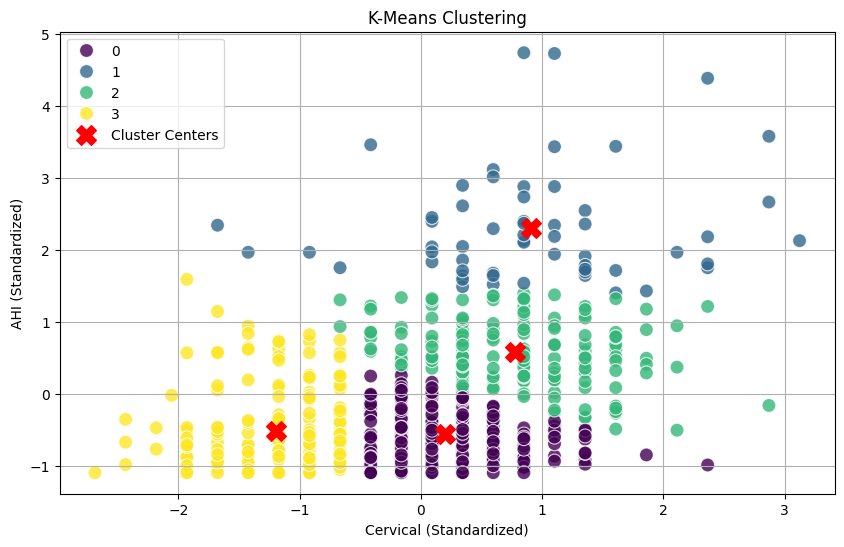

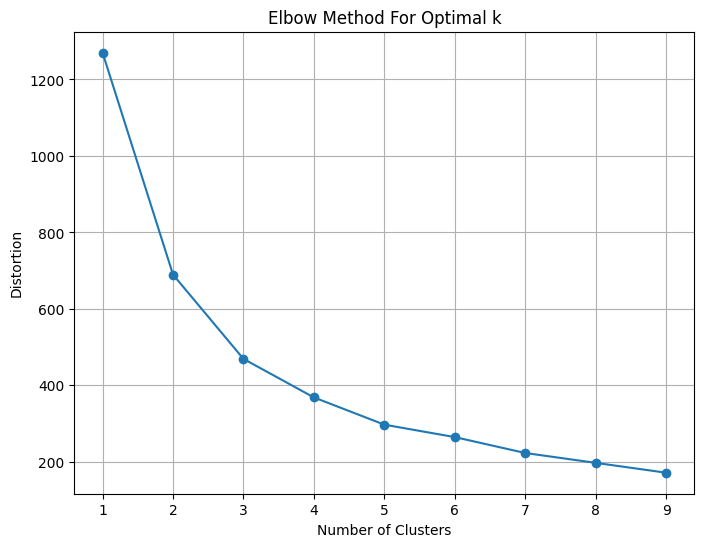

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Ensure the required columns exist
required_columns = ['Cervical', 'AHI']
if all(column in df.columns for column in required_columns):

    # Select features for clustering
    X = df[['Cervical', 'AHI']]

    # Standardize the features to enhance clustering performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define the KMeans model
    kmeans = KMeans(n_clusters=4, random_state=42)

    # Fit the model to the data
    kmeans.fit(X_scaled)

    # Predict cluster labels
    cluster_labels = kmeans.predict(X_scaled)
    df['Cluster'] = cluster_labels

    # Metrics to evaluate clustering performance
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

    # Example predictions with cluster assignments
    print("Example Predictions:")
    example_index = np.random.choice(len(X), 5, replace=False)
    for i, idx in enumerate(example_index):
        features = X.iloc[idx].to_dict()
        cluster = cluster_labels[idx]
        print(f"  Data {i+1}: Features: {features}, Assigned Cluster: {cluster}")

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette="viridis", s=100, alpha=0.8)
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Cluster Centers")
    plt.title("K-Means Clustering")
    plt.xlabel("Cervical (Standardized)")
    plt.ylabel("AHI (Standardized)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Elbow method to determine the optimal number of clusters
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans_model = KMeans(n_clusters=k, random_state=42)
        kmeans_model.fit(X_scaled)
        distortions.append(kmeans_model.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, marker="o")
    plt.title("Elbow Method For Optimal k")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.grid(True)
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")


HIERARCHICAL CLUSTERING

Silhouette Score: 0.3556
Calinski-Harabasz Index: 453.5388
Davies-Bouldin Index: 0.9574
Example Predictions:
  Data 1: Features: {'Cervical': 42.0, 'AHI': 9.2}, Assigned Cluster: 0
  Data 2: Features: {'Cervical': 38.0, 'AHI': 11.0}, Assigned Cluster: 2
  Data 3: Features: {'Cervical': 48.0, 'AHI': 37.0}, Assigned Cluster: 3
  Data 4: Features: {'Cervical': 41.0, 'AHI': 29.0}, Assigned Cluster: 1
  Data 5: Features: {'Cervical': 44.0, 'AHI': 31.3}, Assigned Cluster: 0


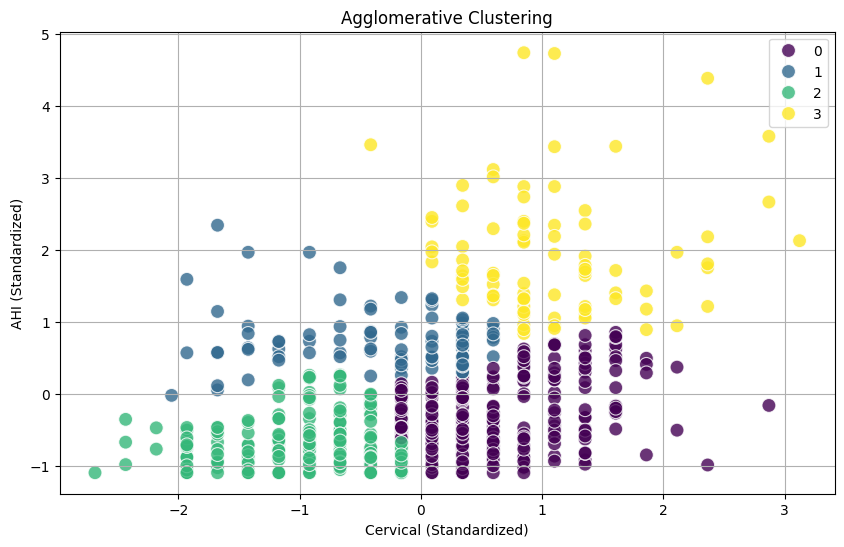

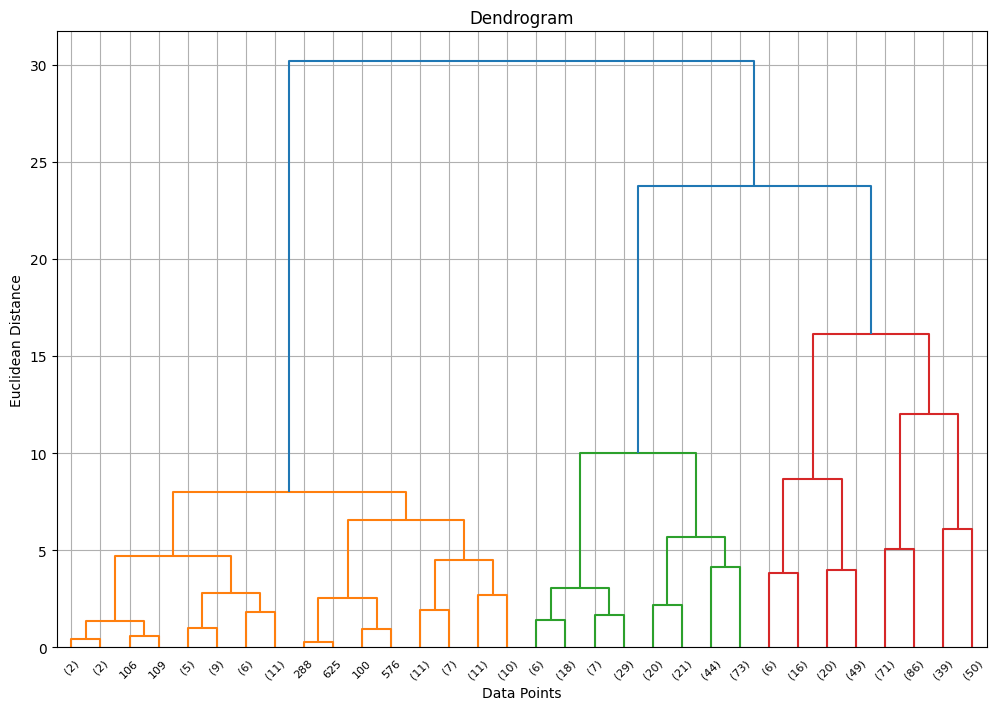

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Ensure the required columns exist
required_columns = ['Cervical', 'BMI', 'AHI']
if all(column in df.columns for column in required_columns):

    # Select features for clustering
    X = df[['Cervical', 'AHI']]

    # Standardize the features to enhance clustering performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define the AgglomerativeClustering model
    agglomerative = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

    # Fit the model to the data and predict cluster labels
    cluster_labels = agglomerative.fit_predict(X_scaled)
    df['Cluster'] = cluster_labels

    # Metrics to evaluate clustering performance
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

    # Example predictions with cluster assignments
    print("Example Predictions:")
    example_index = np.random.choice(len(X), 5, replace=False)
    for i, idx in enumerate(example_index):
        features = X.iloc[idx].to_dict()
        cluster = cluster_labels[idx]
        print(f"  Data {i+1}: Features: {features}, Assigned Cluster: {cluster}")

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette="viridis", s=100, alpha=0.8)
    plt.title("Agglomerative Clustering")
    plt.xlabel("Cervical (Standardized)")
    plt.ylabel("AHI (Standardized)")
    plt.grid(True)
    plt.show()

    # Create and plot dendrogram
    linked = linkage(X_scaled, method='ward')
    plt.figure(figsize=(12, 8))
    dendrogram(linked, truncate_mode='level', p=4, show_leaf_counts=True)
    plt.title("Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Euclidean Distance")
    plt.grid(True)
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")



DBSCAM

Silhouette Score: 0.3086
Calinski-Harabasz Index: 153.7921
Davies-Bouldin Index: 1.7891
Example Predictions:
  Data 1: Features: {'Cervical': 43.0, 'AHI': 13.5}, Assigned Cluster: 0
  Data 2: Features: {'Cervical': 42.0, 'AHI': 14.3}, Assigned Cluster: 0
  Data 3: Features: {'Cervical': 42.0, 'AHI': 52.2}, Assigned Cluster: -1
  Data 4: Features: {'Cervical': 38.0, 'AHI': 8.8}, Assigned Cluster: 0
  Data 5: Features: {'Cervical': 48.0, 'AHI': 4.6}, Assigned Cluster: -1


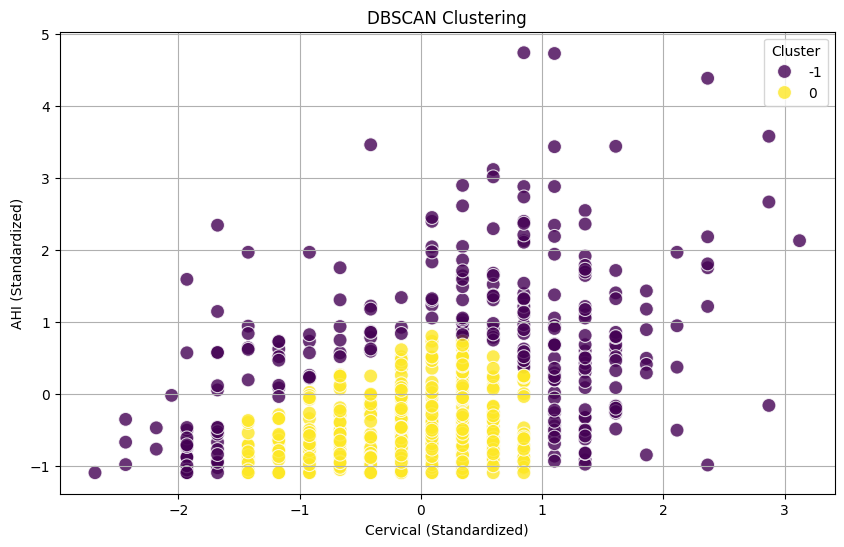

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Ensure the required columns exist
required_columns = ['Cervical', 'AHI']
if all(column in df.columns for column in required_columns):

    # Select features for clustering
    X = df[['Cervical', 'AHI']]

    # Standardize the features to enhance clustering performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define the DBSCAN model
    dbscan = DBSCAN(eps=0.5, min_samples=60, metric='euclidean')

    # Fit the model to the data and predict cluster labels
    cluster_labels = dbscan.fit_predict(X_scaled)
    df['Cluster'] = cluster_labels

    # Metrics to evaluate clustering performance (only for meaningful clusters)
    if len(set(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
        davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

        print(f"Silhouette Score: {silhouette_avg:.4f}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
        print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    else:
        print("Not enough clusters found to compute metrics.")

    # Example predictions with cluster assignments
    print("Example Predictions:")
    example_index = np.random.choice(len(X), 5, replace=False)
    for i, idx in enumerate(example_index):
        features = X.iloc[idx].to_dict()
        cluster = cluster_labels[idx]
        print(f"  Data {i+1}: Features: {features}, Assigned Cluster: {cluster}")

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette="viridis", s=100, alpha=0.8)
    plt.title("DBSCAN Clustering")
    plt.xlabel("Cervical (Standardized)")
    plt.ylabel("AHI (Standardized)")
    plt.grid(True)
    plt.legend(title="Cluster")
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")


GAUSSIAN MIXTURE MODEL

Silhouette Score: 0.2572
Calinski-Harabasz Index: 318.4630
Davies-Bouldin Index: 1.2716
Example Predictions:
  Data 1: Features: {'Cervical': 45.0, 'AHI': 108.4}, Assigned Cluster: 1
  Data 2: Features: {'Cervical': 42.0, 'AHI': 12.6}, Assigned Cluster: 2
  Data 3: Features: {'Cervical': 39.0, 'AHI': 17.8}, Assigned Cluster: 2
  Data 4: Features: {'Cervical': 41.0, 'AHI': 10.0}, Assigned Cluster: 0
  Data 5: Features: {'Cervical': 36.0, 'AHI': 15.0}, Assigned Cluster: 2


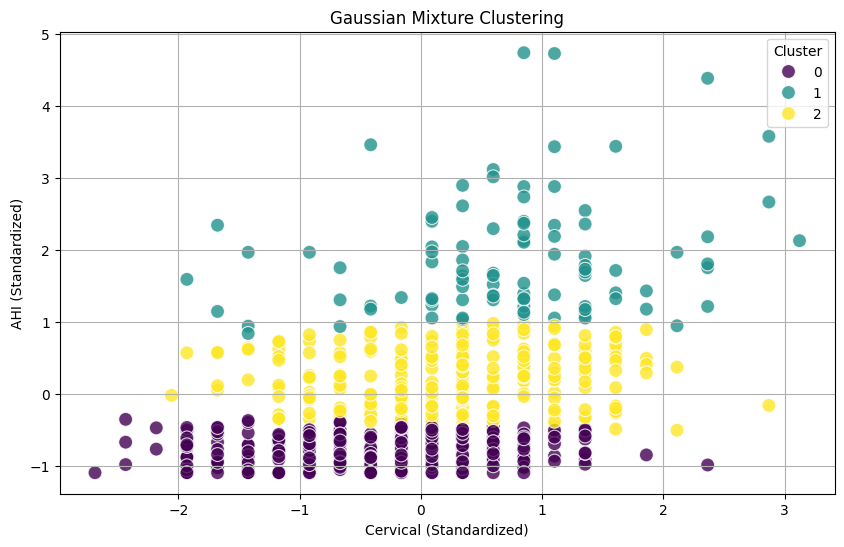

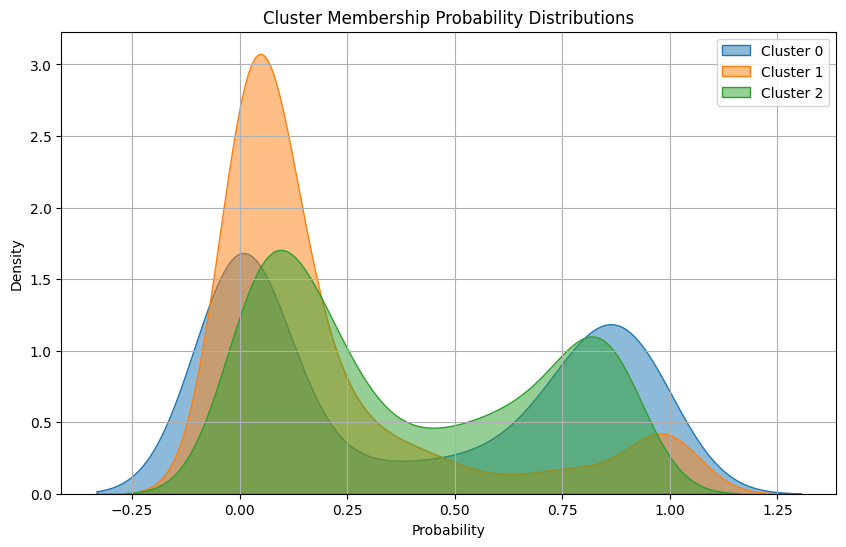

In [20]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the Excel dataset
file_path = '/Users/BVT/Desktop/Master/1º SEMESTRE/Trabajo ML/CODE amp DATA-20241009/DATA/Datos_Limpios_OSA_mas_BMI.xlsx'
# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Ensure the required columns exist
required_columns = ['Cervical', 'AHI']
if all(column in df.columns for column in required_columns):

    # Select features for clustering
    X = df[['Cervical', 'AHI']]

    # Standardize the features to enhance clustering performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)

    # Fit the model to the data and predict cluster labels
    gmm.fit(X_scaled)
    cluster_labels = gmm.predict(X_scaled)
    df['Cluster'] = cluster_labels

    # Metrics to evaluate clustering performance
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

    # Example predictions with cluster assignments
    print("Example Predictions:")
    example_index = np.random.choice(len(X), 5, replace=False)
    for i, idx in enumerate(example_index):
        features = X.iloc[idx].to_dict()
        cluster = cluster_labels[idx]
        print(f"  Data {i+1}: Features: {features}, Assigned Cluster: {cluster}")

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette="viridis", s=100, alpha=0.8)
    plt.title("Gaussian Mixture Clustering")
    plt.xlabel("Cervical (Standardized)")
    plt.ylabel("AHI (Standardized)")
    plt.grid(True)
    plt.legend(title="Cluster")
    plt.show()

    # Visualize the probability distribution of clusters
    probabilities = gmm.predict_proba(X_scaled)
    plt.figure(figsize=(10, 6))
    for i in range(probabilities.shape[1]):
        sns.kdeplot(probabilities[:, i], label=f"Cluster {i}", fill=True, alpha=0.5)
    plt.title("Cluster Membership Probability Distributions")
    plt.xlabel("Probability")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("The required columns are not present in the DataFrame.")
